# Goal
The goal of this notebook is to resample the training data to create an even dataset which can be used for ML training.

# Initialization

In [ ]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

In [ ]:
# Fastai
from fastai.vision.all import *
from fastbook import *
from fastai.vision.data import ImageDataLoaders

# matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# tqdm_notebook
from tqdm import tqdm_notebook

# sklearn
from sklearn.model_selection import train_test_split
from sklearn.utils import resample,shuffle

# NumPy
from numpy import savez_compressed

## Load Data

In [ ]:
# Load Function
def load(f):
    return np.load(f, allow_pickle=True)['arr_0']

In [ ]:
# Load the data
x_train = load('/content/gdrive/MyDrive/Colab Notebooks/fastai/Kanji Project/dataset/06_kkanjiHalf/kkanjiHalf-train-imgs.npz')
y_train = load('/content/gdrive/MyDrive/Colab Notebooks/fastai/Kanji Project/dataset/06_kkanjiHalf/kkanjiHalf-train-labels.npz') 

x_test = load('/content/gdrive/MyDrive/Colab Notebooks/fastai/Kanji Project/dataset/06_kkanjiHalf/kkanjiHalf-test-imgs.npz')
y_test = load('/content/gdrive/MyDrive/Colab Notebooks/fastai/Kanji Project/dataset/06_kkanjiHalf/kkanjiHalf-test-labels.npz') 

In [ ]:
print(f"Training Images: {x_train.shape}")
print(f"Training Labels: {y_train.shape}")
print(f"Test Images: {x_test.shape}")
print(f"Training Labels: {y_test.shape}")

Training Images: (69804, 64, 64)
Training Labels: (69804,)
Test Images: (69805, 64, 64)
Training Labels: (69805,)


In [ ]:
print(f"Unique Kanji characters (Training): {len(np.unique(y_train))}")
print(f"Unique Kanji characters (Test): {len(np.unique(y_test))}")

Unique Kanji characters (Training): 3017
Unique Kanji characters (Test): 3017


## Display Data

In [ ]:
rows = 20
columns = 10
size = 30

def plot_sample_images_data(images, labels):
    plt.figure(figsize=(size,size))
    for i in tqdm_notebook(range(rows)):
        imgs = images[np.where(labels == i)]
        lbls = labels[np.where(labels == i)]
        for j in range(columns):
            plt.subplot(rows,columns,i*10+j+1)
            plt.xticks([])
            plt.yticks([])
            plt.grid(False)
            plt.imshow(imgs[j], cmap=plt.cm.binary)
            plt.xlabel(lbls[j])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  import sys


  0%|          | 0/20 [00:00<?, ?it/s]

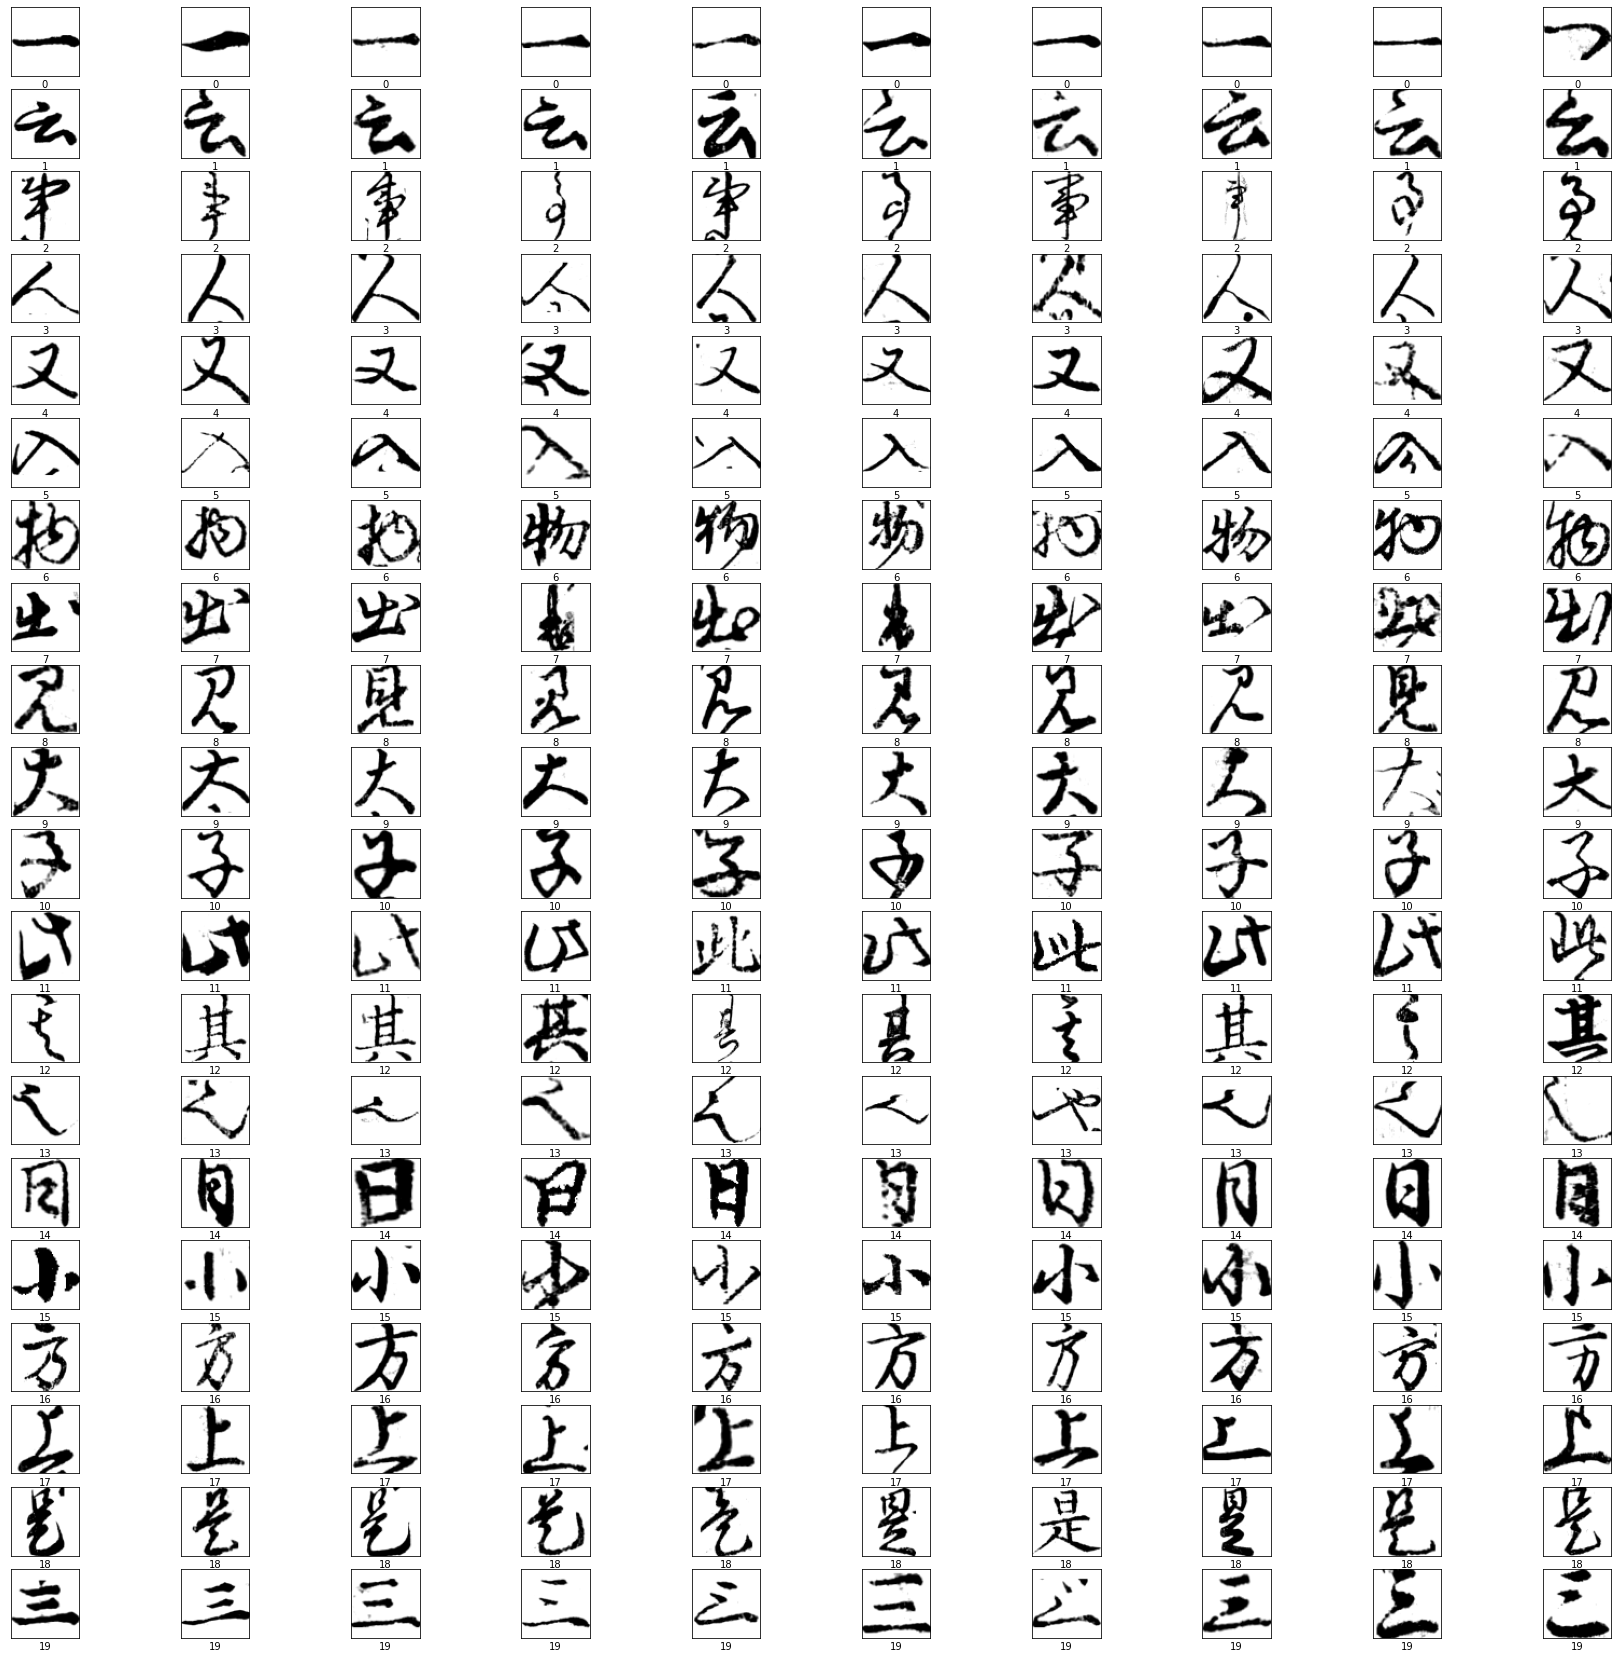

In [ ]:
plot_sample_images_data(x_train, y_train)

# Resample Data

## Reshape Data

In [ ]:
# Reshape the 3D ndarray (69804 x 64 x 64) into a 2D array (69804 x 4096) 
new_x_train = x_train[:1000]
dim_0, dim_1, dim_2 = new_x_train.shape
new_x_train = np.array(new_x_train).reshape(dim_0, dim_1 * dim_2)

# Add a label column
label = pd.DataFrame(y_train[:1000])
new_x_train = pd.DataFrame(new_x_train)
new_x_train['label'] = label

# Add a count column (number of occurences of a label)
# New shape is (69804 x 4098)
count = pd.DataFrame(new_x_train['label'].value_counts())
count.columns = ['count']
count['label'] = count.index
new_x_train = pd.merge(new_x_train,count, on='label')

In [ ]:
new_x_train

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,...,3599,3600,3601,3602,3603,3604,3605,3606,3607,3608,3609,3610,3611,3612,3613,3614,3615,3616,3617,3618,3619,3620,3621,3622,3623,3624,3625,3626,3627,3628,3629,3630,3631,3632,3633,3634,3635,3636,3637,3638,3639,3640,3641,3642,3643,3644,3645,3646,3647,3648,3649,3650,3651,3652,3653,3654,3655,3656,3657,3658,3659,3660,3661,3662,3663,3664,3665,3666,3667,3668,3669,3670,3671,3672,3673,3674,3675,3676,3677,3678,3679,3680,3681,3682,3683,3684,3685,3686,3687,3688,3689,3690,3691,3692,3693,3694,3695,3696,3697,3698,3699,3700,3701,3702,3703,3704,3705,3706,3707,3708,3709,3710,3711,3712,3713,3714,3715,3716,3717,3718,3719,3720,3721,3722,3723,3724,3725,3726,3727,3728,3729,3730,3731,3732,3733,3734,3735,3736,3737,3738,3739,3740,3741,3742,3743,3744,3745,3746,3747,3748,3749,3750,3751,3752,3753,3754,3755,3756,3757,3758,3759,3760,3761,3762,3763,3764,3765,3766,3767,3768,3769,3770,3771,3772,3773,3774,3775,3776,3777,3778,3779,3780,3781,3782,3783,3784,3785,3786,3787,3788,3789,3790,3791,3792,3793,3794,3795,3796,3797,3798,3799,3800,3801,3802,3803,3804,3805,3806,3807,3808,3809,3810,3811,3812,3813,3814,3815,3816,3817,3818,3819,3820,3821,3822,3823,3824,3825,3826,3827,3828,3829,3830,3831,3832,3833,3834,3835,3836,3837,3838,3839,3840,3841,3842,3843,3844,3845,3846,3847,3848,3849,3850,3851,3852,3853,3854,3855,3856,3857,3858,3859,3860,3861,3862,3863,3864,3865,3866,3867,3868,3869,3870,3871,3872,3873,3874,3875,3876,3877,3878,3879,3880,3881,3882,3883,3884,3885,3886,3887,3888,3889,3890,3891,3892,3893,3894,3895,3896,3897,3898,3899,3900,3901,3902,3903,3904,3905,3906,3907,3908,3909,3910,3911,3912,3913,3914,3915,3916,3917,3918,3919,3920,3921,3922,3923,3924,3925,3926,3927,3928,3929,3930,3931,3932,3933,3934,3935,3936,3937,3938,3939,3940,3941,3942,3943,3944,3945,3946,3947,3948,3949,3950,3951,3952,3953,3954,3955,3956,3957,3958,3959,3960,3961,3962,3963,3964,3965,3966,3967,3968,3969,3970,3971,3972,3973,3974,3975,3976,3977,3978,3979,3980,3981,3982,3983,3984,3985,3986,3987,3988,3989,3990,3991,3992,3993,3994,3995,3996,3997,3998,3999,4000,4001,4002,4003,4004,4005,4006,4007,4008,4009,4010,4011,4012,4013,4014,4015,4016,4017,4018,4019,4020

## Resample Data

In [ ]:
# Array for already processed labels
my_input = []

# Sample Size
sample_size = 10

# DataFrame for remaining rows
df_rest = new_x_train.iloc[:1]

# DataFrame for resampled rows
df_rest_upsampled = new_x_train.iloc[:1]

# Boolean if rows should be added to the test dataset 2
restAdapt = False 

for item in range(len(new_x_train)):
  if (new_x_train.iloc[item,4096] not in my_input): #Check if the label has already been processed
    # Selction of label and DataFrame
    df_1 = new_x_train[new_x_train['label'] == new_x_train.iloc[item,4096]]

    # Check if count bigger than sample_size, then randomly select sample size rows
    if df_1.iloc[0,4097] > sample_size:
      testSeriesNP = df_1.index.to_numpy() # indexes of the labels
      training, testing, _, _ = train_test_split(testSeriesNP,testSeriesNP, test_size=sample_size, random_state=42) # randomly select the sample_size
      df_1_upsampled = new_x_train.iloc[testing] # randomly selected sample size
      df_rest_upsampled = new_x_train.iloc[training] # remaining rows, used for test dataset 2
      restAdapt = True
      my_input.append(new_x_train.iloc[item,4096])

    else: # if count is smaller than sample_size, resample to sample_size
      df_1_upsampled = resample(df_1,random_state=42,n_samples=sample_size,replace=True)
      my_input.append(new_x_train.iloc[item,4096])
        
    # Create the final DataFrame
    if item == 0:
      df_upsampled = df_1_upsampled
      df_rest = df_rest_upsampled
      restAdapt = False
    else:
      df_upsampled = pd.concat([df_1_upsampled,df_upsampled])
      if restAdapt:
        df_rest = pd.concat([df_rest_upsampled,df_rest])
        restAdapt = False

# Delete
df_upsampled.drop(['count'], axis=1, inplace=True)

# Delete not required rows and columns
df_rest.drop(df_rest.tail(1).index,inplace=True)
df_rest.drop(['count'], axis=1, inplace=True)

# Transform back to NumPy

## New training dataset

In [ ]:
# Extract label
new_y_train = df_upsampled['label']
new_y_train = new_y_train.to_numpy().astype(int)

# Delete column
df_upsampled.drop(['label'], axis=1, inplace=True)

In [ ]:
# Dimensions
new_dim1 = df_upsampled.shape[0]
old_dim = 64

In [ ]:
# reshape into the new dimension
new_x_train = np.array(df_upsampled).reshape(new_dim1, old_dim,old_dim)

In [ ]:
print(f"Training Images: {new_x_train.shape}")
print(f"Training Labels: {new_y_train.shape}")

Training Images: (5290, 64, 64)
Training Labels: (5290,)


In [ ]:
print(f"Unique Kanji characters (Training): {len(np.unique(new_y_train))}")

Unique Kanji characters (Training): 529


In [ ]:
#savez_compressed('/content/gdrive/MyDrive/Colab Notebooks/fastai/Kanji Project/dataset/10_kkanjiTenTo150/kkanjiTenTo150-train-imgs.npz', new_x_train)
#savez_compressed('/content/gdrive/MyDrive/Colab Notebooks/fastai/Kanji Project/dataset/10_kkanjiTenTo150/kkanjiTenTo150-train-labels.npz', new_y_train)

## Final Test Dataset

In [ ]:
# Extract label
new_y_test2 = df_rest['label']
new_y_test2 = new_y_test2.to_numpy().astype(int)

# Delete column
df_rest.drop(['label'], axis=1, inplace=True)

# concatenate test labels and new labels for the final test dataset
final_y_test = np.concatenate([y_test,new_y_test2], -1)

In [ ]:
# Dimensions - original test dataset
dim_0, dim_1, dim_2 = x_test.shape

# Reshaping for Pandas DataFrame
new_x_test = np.array(x_test).reshape(dim_0, dim_1 * dim_2)
new_x_test = pd.DataFrame(new_x_test)

# Concatenate test and rest
final_x_test = pd.concat([new_x_test,df_rest])

In [ ]:
# Dimensions
new_dim1 = final_x_test.shape[0]
old_dim = 64

# reshape into the new dimension for Numpy ndarray 
final_x_test = np.array(final_x_test).reshape(new_dim1, old_dim,old_dim)

In [ ]:
print(f"Training Images: {final_x_test.shape}")
print(f"Training Labels: {final_y_test.shape}")

Training Images: (69821, 64, 64)
Training Labels: (69821,)


In [ ]:
print(f"Unique Kanji characters (Training): {len(np.unique(final_y_test))}")

Unique Kanji characters (Training): 3017


In [ ]:
#savez_compressed('/content/gdrive/MyDrive/Colab Notebooks/fastai/Kanji Project/dataset/07_kkanjiHalf150/kkanjiHalf150-final-test-imgs.npz', final_x_test)
#savez_compressed('/content/gdrive/MyDrive/Colab Notebooks/fastai/Kanji Project/dataset/07_kkanjiHalf150/kkanjiHalf150-final-test-labels.npz', final_y_test)